In [1]:
# Importing the required libraries
import seaborn as sns
from config import TRAIN_IMAGES, TRAIN_LABELS, TEST_IMAGES, YAML_CONFIG
from train import train_yolov8
from visualize import plot_train_images, plot_metrics, evaluate_model_on_test_images
sns.set_style('darkgrid')

%matplotlib inline

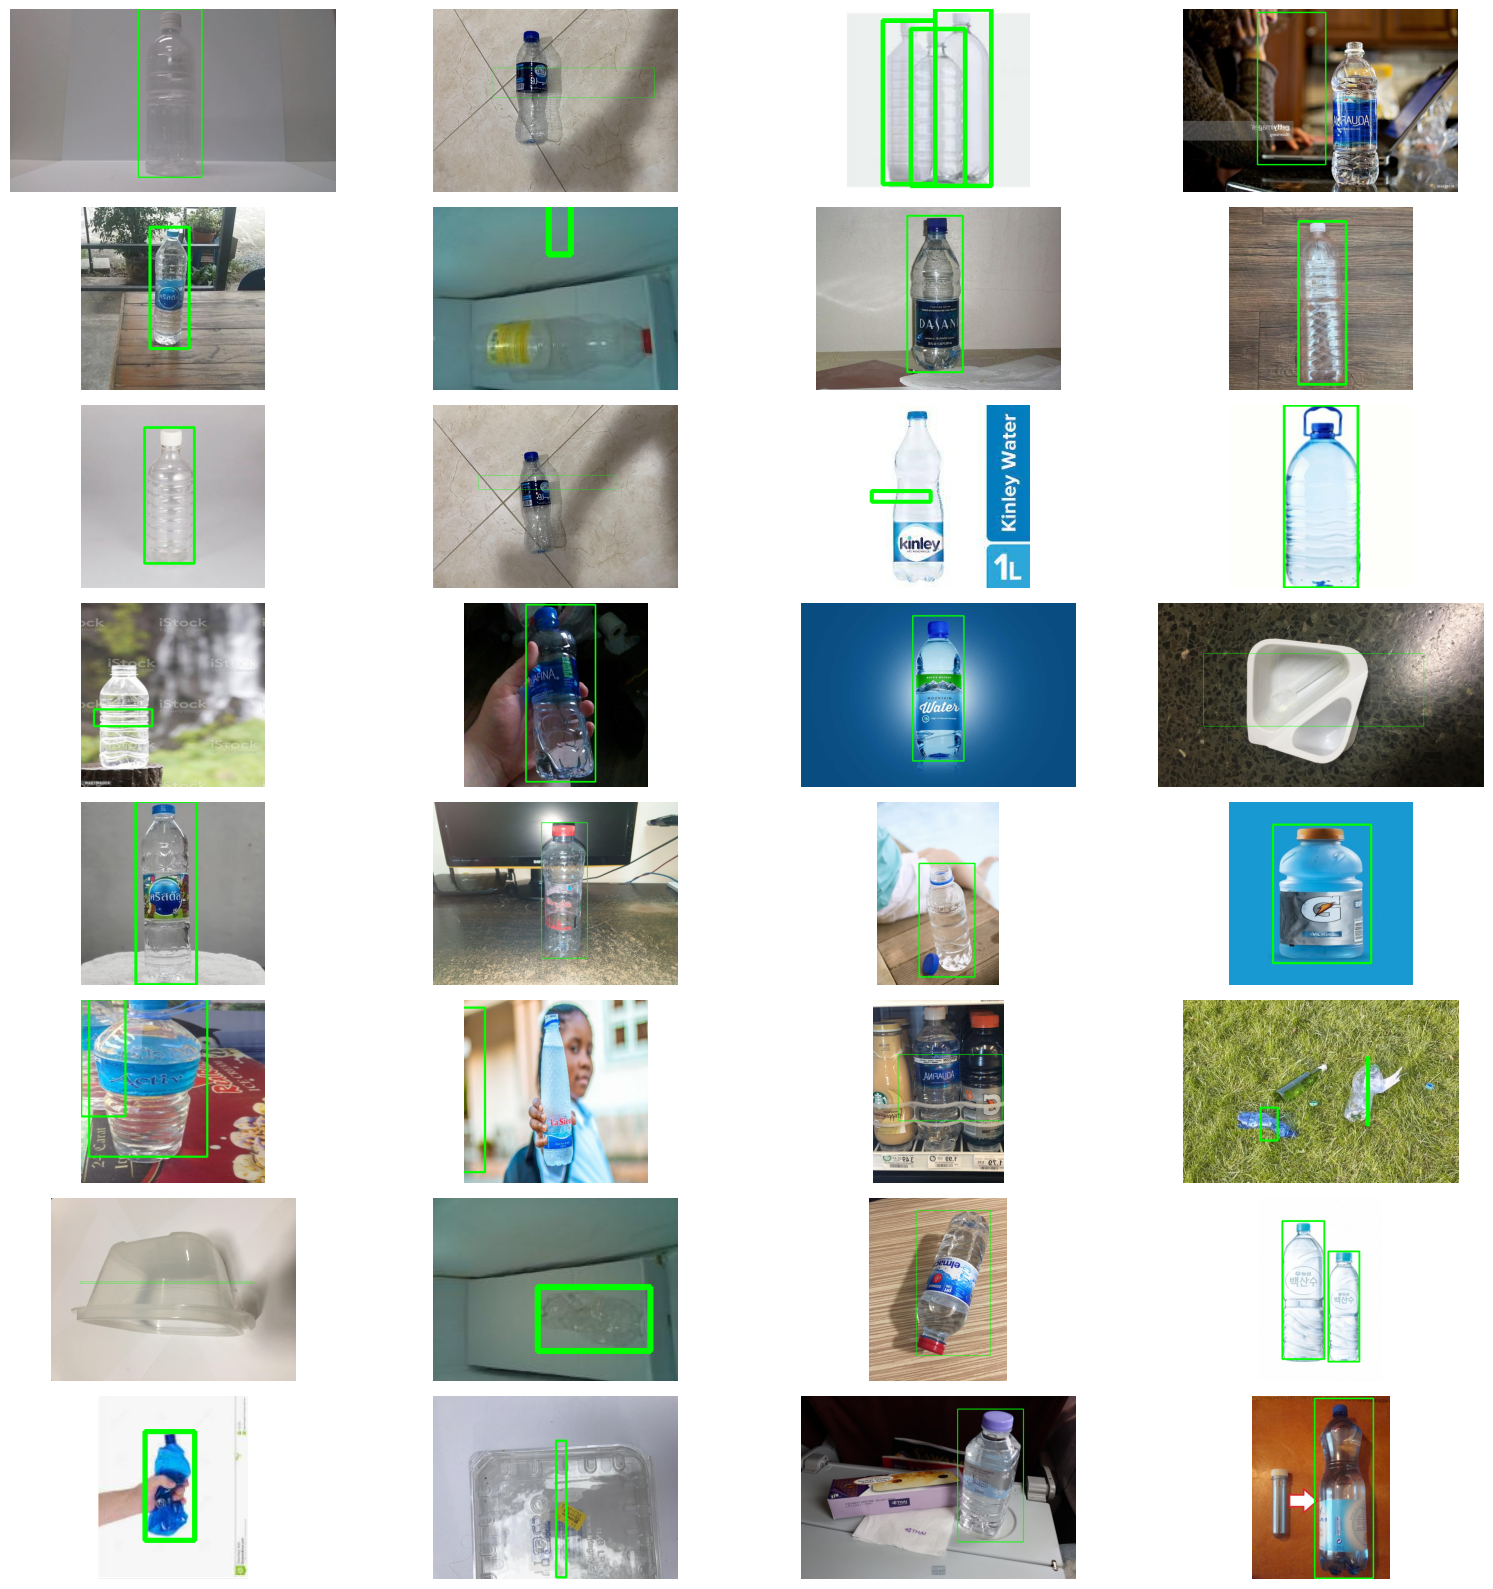

In [2]:
plot_train_images(images_path=TRAIN_IMAGES, labels_path=TRAIN_LABELS, num_images=32)

In [3]:
params = {
    "data": YAML_CONFIG,
    "epochs": 15,
    "imgsz": (340, 340, 3),
    "seed": 42,
    "batch": 64,
    "workers": 4
}

In [4]:
model = train_yolov8(params)

New https://pypi.org/project/ultralytics/8.0.106 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.105 🚀 Python-3.10.4 torch-2.0.1+cu117 CUDA:0 (GeForce RTX 2080 Ti, 11019MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/root/hamza/yolo/data/plastic_bottle_img_dataset/data.yaml, epochs=15, patience=50, batch=64, imgsz=(340, 340, 3), save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic

       6/15      2.62G      1.474      1.475       1.45        207        352: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1174       1550      0.275      0.296      0.199      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/15       2.8G      1.438      1.415       1.43        261        352: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1174       1550       0.48      0.352      0.293      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/15       2.8G      1.416      1.412      1.418        218        352: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1174       1550      0.573      0.475      0.364      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/1

In [5]:
# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.105 🚀 Python-3.10.4 torch-2.0.1+cu117 CUDA:0 (GeForce RTX 2080 Ti, 11019MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /root/hamza/yolo/data/plastic_bottle_img_dataset/test/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 20, len(boxes) = 792. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        648        792      0.531       0.52      0.426       0.33
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val7


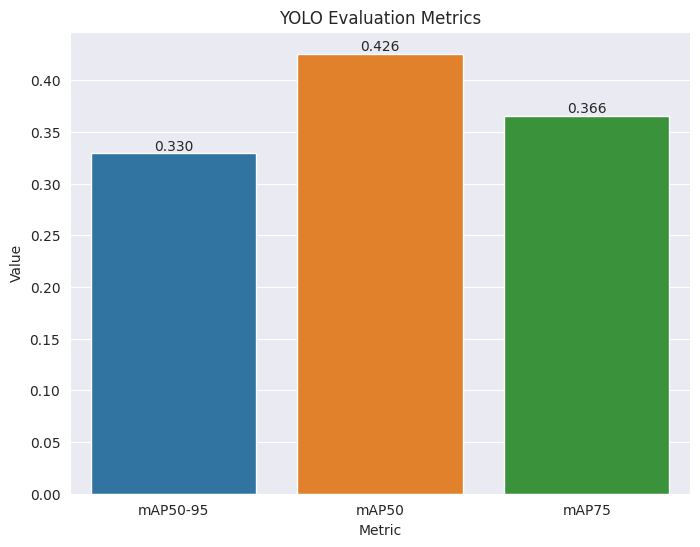

In [6]:
plot_metrics(metrics)


0: 352x256 1 bottle, 92.4ms
Speed: 5.0ms preprocess, 92.4ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 352)

0: 352x256 1 bottle, 5.5ms
Speed: 1.1ms preprocess, 5.5ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 352)

0: 352x256 1 bottle, 5.5ms
Speed: 1.2ms preprocess, 5.5ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 352)

0: 352x352 1 bottle, 5.6ms
Speed: 1.1ms preprocess, 5.6ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 352)

0: 352x352 1 bottle, 5.2ms
Speed: 1.1ms preprocess, 5.2ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 352)

0: 352x256 1 bottle, 5.5ms
Speed: 1.1ms preprocess, 5.5ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 352)

0: 256x352 1 bottle, 80.2ms
Speed: 1.6ms preprocess, 80.2ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 352)

0: 256x352 (no detections), 6.0ms
Speed: 1.9ms preprocess, 6.0ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 35

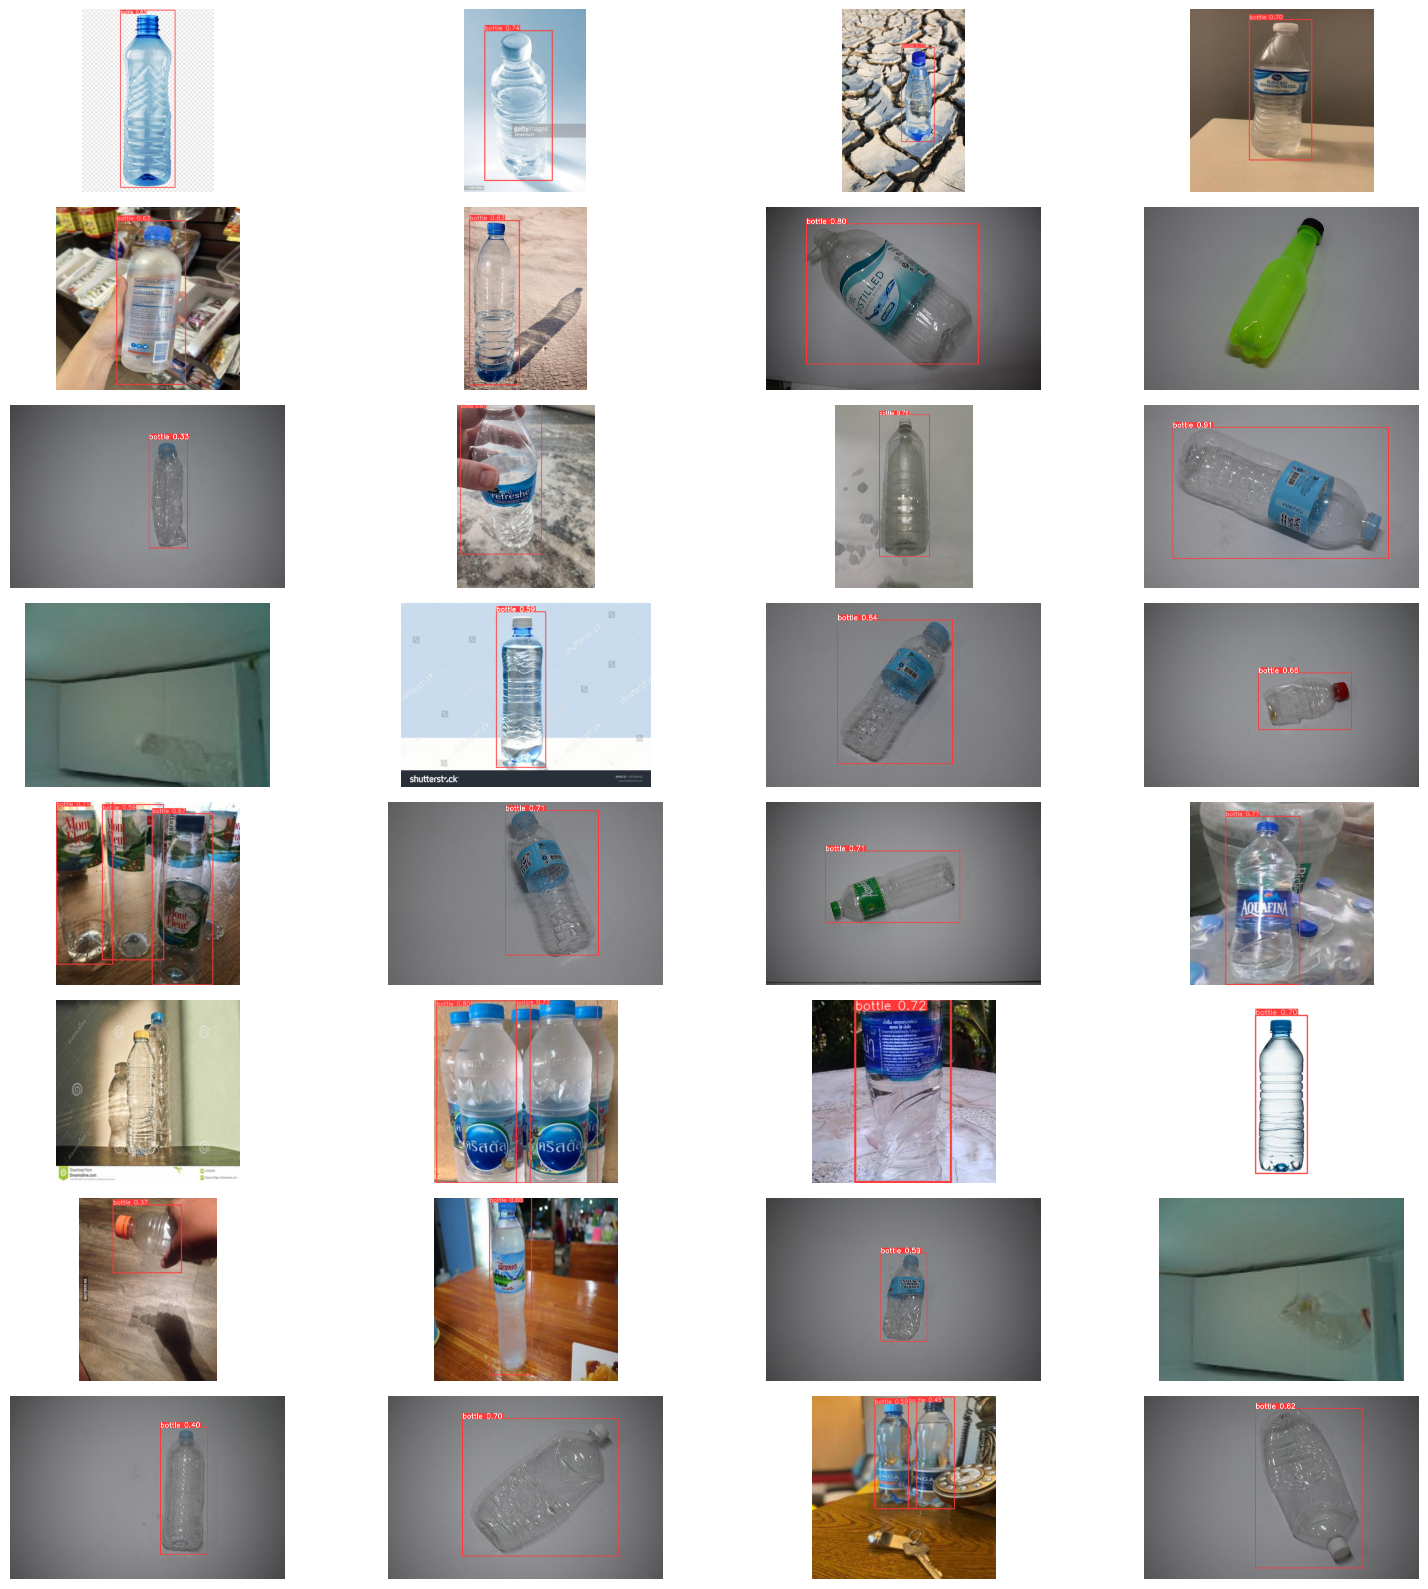

In [7]:
evaluate_model_on_test_images(model=model, images_path=TEST_IMAGES, num_images=32)